<span style="font-size: 30px;">User Feedback</span>

In [14]:
import openai
from fractions import Fraction
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import time

In [3]:
def callGPTAdaptive(messages):
    openai.api_type = "azure"
    openai.api_base = "REMOVED"
    openai.api_key = 'REMOVED'
    openai.api_version = "2023-05-15"
    response = openai.ChatCompletion.create(
        engine="GPT4",
        messages=messages
        
    )
   
    return (response['choices'][0]['message']['content'])


In [3]:
convo = [
"Friend 1: hey, did you hear? it's Jack's birthday next week!",
"Friend 2:yeap, i know!", 
"Friend 1:well, I thought we could plan a surprise party for him. what do you think?",
"Friend 2:we could do that but parties can get boring ", #1
"Friend 1:we can do something else then. like a movie night at the theater? ",
"Friend 2:we could do that yes!!",
"Friend 1:awesome! we can pick a movie that everyone likes. Are you into horror films?",
"Friend 2: horror can be quite appealing for those who like a bit of a fright. It's not my cup of tea, though.", #2
"Friend 1:LOL. sometimes a good horror flick can be a fun experience.",
"Friend 2:if jack likes it, i am ok with it i guess!",
"Friend 1:by the way, have you thought about what kind of birthday present we should get him?",
"Friend 2: is it possible that we get a gift card instead?", #3
"Friend 1:it might be nice to show him that we put some thought into it. Plus, it's his birthday, and he's our friend.",
"Friend 2:yeah, you are actually right. we can go to the store tomorrow to see what we can get.",
"Friend 1:We can split costs. What is your budget?",
"Friend 2:hmm I am not sure. I wasn't planning on spending too much.", #4
"Friend 1:okay sure… There is a store at a 20 min walk from the office. We can go there.",
"Friend 2:alright, I'll put on my joggers then haha",
"Friend 1:LOL! Should we invite others too?",
"Friend 2:i am not too sure about that", #5
"Friend 1:why not?",
"Friend 2:I find coordinating with others a bit of a challenge, but if you can do it, then sure.", #6
"Friend 1:okay! lets talk about this later. see you at the office tomorrow then.",
"Friend 2:See you!"]

In [4]:
#changing this
convo = [
"Friend 1: hey, did you hear? it's Jack's birthday next week!",
"Friend 2:yeap, i know!", 
"Friend 1:well, I thought we could plan a surprise party for him. what do you think?",
"Friend 2:we could do that, but parties can get a bit boring tbh ", #1
"Friend 1:we can do something else then. like a movie night at the theater? ",
"Friend 2:we could do that, yes!",
"Friend 1:awesome! we can pick a movie that everyone likes. Are you into horror films?",
"Friend 2: oh no... horror is not my cup of tea", #2
"Friend 1:LOL. sometimes a good horror flick can be a fun experience.",
"Friend 2:if jack likes it, i am ok with it i guess",
"Friend 1:by the way, have you thought about what kind of birthday gift we should get him?",
"Friend 2: is it possible that we get a gift card instead?", #3
"Friend 1:it might be nice to show him that we put some thought into his bday present. it's his birthday, and he's our friend!!",
"Friend 2:yeah, you are actually right. we can go to the store tomorrow to see what we can get.",
"Friend 1:We can split costs. What is your budget?",
"Friend 2:hmm I wasn't planning on spending too much.", #4
"Friend 1:okay sure… There is a store at a 20 min walk from the office. We can go there.",
"Friend 2:alright, I'll put on my joggers then haha",
"Friend 1:LOL! Should we invite others too?",
"Friend 2:i am not too sure about that", #5
"Friend 1:why not?",
"Friend 2: coordinating with others could be a bit of a challenge, but if we do it together, then sure.", #6
"Friend 1:okay! lets talk about this later. see you at the office tomorrow then.",
"Friend 2:See you!"]

In [146]:
sampleConvo = "Friend1: Hey! Do you want to go for day trip anytime soon?\nFriend2: Well, I was thinking, how about a trip to Gloucester, Massachusetts this weekend?"
sampleOutput = "0/10"
task = "\n\nOut of 10 points, rate how blunt was the tone/intent of the last message in the conversation above."
samplePrompt = sampleConvo + task

In [15]:
import time
def adaptiveRoutine(mode):
    responses=[]
    messages=[
        {"role":"user","content":samplePrompt},
        {"role":"assistant","content":sampleOutput},

    ]
    currentConvo=""
    lastFeedback = ""
    count=0
    for i in range(len(convo)):
        currentConvo = currentConvo + convo[i] + "\n"
        
        if((((i+1)%4==0) or (i==len(convo)-3)) and (i< (len(convo)-1))):
            
            messages.append({"role":"user","content": currentConvo + task})
            #for j in messages:
            #    print(j)
                
            response = callGPTAdaptive(messages)
            time.sleep(2)
            #print(messages,'\n\n')
            count+=1
            #print("Response#" + str(count) +":\n" + response +"\n")
            response = response.replace("\n","").replace(" ","")
            responses.append(float(Fraction(response)))
            messages.append({"role":"assistant","content":response})
            if(mode=="more blunt"):
                #print("MB")
                lastFeedback = "Actually, the previous message was more blunt than your rating. Take this as ground truth, compare it with your previous rating and adjust your sensitivity for future."
                messages.append({"role":"user","content":lastFeedback})
            elif(mode =="less blunt"):
                #print("LB")
                lastFeedback = "Actually, the previous message was less blunt than your rating. Take this as ground truth, compare it with your previous rating and adjust your sensitivity for future."
                messages.append({"role":"user","content":lastFeedback})
            else:
                pass
    
            # userInput = input ('Please provide feedback in terms of "y" or "n"')
            # if userInput == "y":
            #     lastFeedback = "I agree with your last answer - that message was blunt/rude. Take this and prior feedback into account to adjust the sensitivity of your classification."
            #     messages.append({"role":"user","content":lastFeedback})
            # elif userInput == "n":
            #     #lastFeedback = "I do not agree with you that the last message you classified was blunt/rude as this is a close friend of mine."
            #     #lastFeedback = "I do not agree with you that the last message you classified was blunt/rude as this is a close friend of mine. Reduce your sensitivity a little."
            #     lastFeedback = "I do not agree with your last answer - that message was not blunt as this is how these 2 friends, who are very close, talk to each other. Take this and prior feedback into account to adjust the sensitivity of your classification."
            #     messages.append({"role":"user","content":lastFeedback})
            # else:
            #     return
    return np.array(responses)

        
        

In [124]:
bluntRespA = adaptiveRoutine("more blunt")
bluntRespB = adaptiveRoutine("more blunt")
bluntRespC = adaptiveRoutine("more blunt")

In [125]:
nBluntRespA = adaptiveRoutine("less blunt")
nBluntRespB = adaptiveRoutine("less blunt")
nBluntRespC = adaptiveRoutine("less blunt")

In [126]:
noneRespA = adaptiveRoutine("none")
noneRespB = adaptiveRoutine("none")
noneRespC = adaptiveRoutine("none")

In [127]:
noneFinal = (noneRespA + noneRespB + noneRespC)/3
bluntFinal = (bluntRespA + bluntRespB + bluntRespC)/3
nBluntFinal = (nBluntRespA + nBluntRespB + nBluntRespC)/3

x = [1, 2, 3, 4, 5, 6]

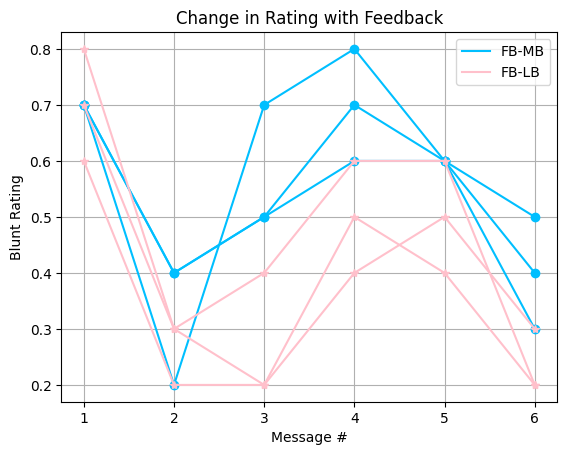

In [133]:
# Create the plot
#plt.plot(x, nBluntFinal, label="N", color = 'green', marker='^')
#plt.plot(x, bluntRespA, label='MB', color='deepskyblue', marker='o')
#plt.plot(x, nBluntRespA, label='LN', color='pink', marker='*')

plt.plot(x, bluntRespA, label='B1', color='deepskyblue', marker='o')
plt.plot(x, bluntRespB, label='B2', color='deepskyblue', marker='o')
plt.plot(x, bluntRespC, label='B3', color='deepskyblue', marker='o')


plt.plot(x, nBluntRespA, label='N1', color='pink', marker='*')
plt.plot(x, nBluntRespB, label='N2', color='pink', marker='*')
plt.plot(x, nBluntRespC, label='N3', color='pink', marker='*')

# Add legend with customized labels for the two sets of lines
legend_elements = [
    #Line2D([0], [0], color='green', label='FB-N'),
    Line2D([0], [0], color='deepskyblue', label='FB-MB'),
    Line2D([0], [0], color='pink', label='FB-LB')
]

plt.legend(
    handles=legend_elements,
    loc='upper right'
)

# Add labels and title
plt.xlabel('Message #')
plt.ylabel('Blunt Rating')
plt.title('Change in Rating with Feedback')

# Show the plot
plt.grid(True)
plt.show()






In [196]:
evaluateBluntness(m2)

'Low'

In [149]:

m1=[
"Friend 1: hey, did you hear? it's Jack's birthday next week!",
"Friend 2:yeap, i know!", 
"Friend 1:well, I thought we could plan a surprise party for him. what do you think?",
"Friend 2:no parties can get boring" #1
]

m2=m1 + [
"Friend 1:we can do something else then. like a movie night at the theater? ",
"Friend 2:we could do that, yes!",
"Friend 1:awesome! we can pick a movie that everyone likes. Are you into horror films?",
"Friend 2: umm... horror is not my cup of tea really" #2
]

m3= m2 + [
"Friend 1:LOL. sometimes a good horror flick can be a fun experience.",
"Friend 2:if jack likes it, i am ok with it i guess",
"Friend 1:by the way, have you thought about what kind of birthday gift we should get him?",
"Friend 2: is it possible that we get a gift card instead?" #3
]

m4= m3 + [
"Friend 1:it might be nice to show him that we put some thought into his bday present. it's his birthday, and he's our friend!!",
"Friend 2:yeah, you are actually right. we can go to the store tomorrow to see what we can get.",
"Friend 1:We can split costs. What is your budget?",
"Friend 2:hmm I wasn't planning on spending too much.", #4
]

m5=m4 + [
"Friend 1:okay sure… There is a store at a 20 min walk from the office. We can go there.",
"Friend 2:alright, I'll put on my joggers then haha",
"Friend 1:LOL! Should we invite others too?",
"Friend 2:we can... but is that necessary?" #5
]

m6= m5 + [
"Friend 1:not really, but why should we not?",
"Friend 2: it is a pain to coordinate with multiple people" #6
]

In [1]:

m1=[
"Friend 1: hey, did you hear? it's Jack's birthday next week!",
"Friend 2:yeap, i know!", 
"Friend 1:well, I thought we could plan a surprise party for him. ",
"Friend 2:hmm.. is a party our only option", #1
]

m2=m1 + [
"Friend 1:nope, we can do something else too. like a movie night at the theater. ",
"Friend 2:we could do that, yes!",
"Friend 1:awesome! we can pick a movie that everyone likes. Are you into horror films?",
"Friend 2: no... horror is for kids who want to be scared", #2
]

m3= m2 + [
"Friend 1:LOL. sometimes a good horror flick can be a fun experience, even for grown ups.",
"Friend 2:if it will make jack happy, i am ok with it i guess",
"Friend 1:by the way, have you thought about what kind of birthday gift we should get him?",
"Friend 2: can't we just get him a gift card instead?", #3
]

m4= m3 + [
"Friend 1:it might be nice to show him that we put some thought into his bday present. it's his birthday, and he's our friend!!",
"Friend 2:yeah, you are actually right. we can go to the store tomorrow to see what we can get.",
"Friend 1:we can split costs. what is your budget?",
"Friend 2:I do not want to spend too much.", #4
]

m5=m4 + [
"Friend 1:thats fine... There is a store at a 20 min walk from the office. We can go there.",
"Friend 2:alright, I'll put on my joggers then haha",
"Friend 1:LOL! Should we invite others too?",
"Friend 2: umm... is that necessary?", #5
]

m6= m5 + [
"Friend 1:nope, not really",
"Friend 2:so let’s not, I guess.",
"Friend 1: why though?",
"Friend 2: coordinating with others is a hassle",#6
#i kind of find it hard to take everyone on board

]

m7 = m6 +[
    "Friend 1: Lol okay if you say so! see you in class tomorrow then.",
    "Friend 2: oki! catch you later :)",
]

In [2]:
for message in m7:
    print(message.replace("Friend 1", "Ben").replace("Friend 2","Suggested Response"))

Ben: hey, did you hear? it's Jack's birthday next week!
Suggested Response:yeap, i know!
Ben:well, I thought we could plan a surprise party for him. 
Suggested Response:hmm.. is a party our only option
Ben:nope, we can do something else too. like a movie night at the theater. 
Suggested Response:we could do that, yes!
Ben:awesome! we can pick a movie that everyone likes. Are you into horror films?
Suggested Response: no... horror is for kids who want to be scared
Ben:LOL. sometimes a good horror flick can be a fun experience, even for grown ups.
Suggested Response:if it will make jack happy, i am ok with it i guess
Ben:by the way, have you thought about what kind of birthday gift we should get him?
Suggested Response: can't we just get him a gift card instead?
Ben:it might be nice to show him that we put some thought into his bday present. it's his birthday, and he's our friend!!
Suggested Response:yeah, you are actually right. we can go to the store tomorrow to see what we can get.
Be

In [17]:
def evaluateBluntness(messages):
    
    messageBox = [{"role":"user", "content":"Here is a conversation:\n" + "\n".join(messages) + "\nIn this conversation's context, specify the bluntness of this particular message in 1 word either as high, medium, low or nill:\n" + messages[-1]}]
    resp = callGPTAdaptive(messageBox)
    return resp
    

In [18]:
print(repeatTest(m5,"M5"),"\n\n")

Message:  M5
Friend 2: umm... is that necessary?
{'high': 8, 'medium': 2, 'low': 0, 'nill': 0} 




In [19]:
def repeatTest(message,name):
    print("Message: ", name)
    output = {"high":0,"medium":0,"low":0,"nill":0}
    for i in range(10):
        out = ""
        try:
            out = evaluateBluntness(message)
        except:
            time.sleep(7)
            out = evaluateBluntness(message)
        if "high" in out.lower():
            output["high"] +=1
        elif "medium" in out.lower():
            output["medium"] +=1
        elif "low" in out.lower():
            output["low"] +=1
        elif "nill" in out.lower():
            output["nill"] +=1
    print(message[-1])
    return output

print(repeatTest(m1,"M1"),"\n\n")

print(repeatTest(m2,"M2"),"\n\n")

print(repeatTest(m3,"M3"),"\n\n")

print(repeatTest(m4,"M4"),"\n\n")

print(repeatTest(m5,"M5"),"\n\n")

print(repeatTest(m6,"M6"),"\n\n")

Message:  M1
Friend 2:hmm.. is a party our only option
{'high': 0, 'medium': 8, 'low': 2, 'nill': 0} 


Message:  M2
Friend 2: no... horror is for kids who want to be scared
{'high': 10, 'medium': 0, 'low': 0, 'nill': 0} 


Message:  M3
Friend 2: can't we just get him a gift card instead?
{'high': 4, 'medium': 5, 'low': 1, 'nill': 0} 


Message:  M4
Friend 2:I do not want to spend too much.
{'high': 6, 'medium': 4, 'low': 0, 'nill': 0} 


Message:  M5
Friend 2: umm... is that necessary?
{'high': 7, 'medium': 3, 'low': 0, 'nill': 0} 


Message:  M6
Friend 2: coordinating with others is a hassle
{'high': 10, 'medium': 0, 'low': 0, 'nill': 0} 


